In [3]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 

## Plot of steamfunction and potential vorticity in low F

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2', 'q1', 'q2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(100, 512, 64)


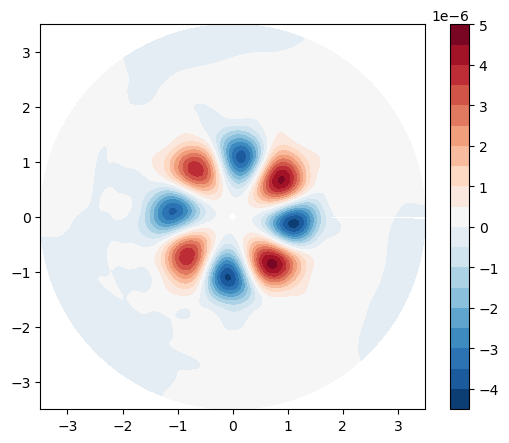

In [8]:
import h5py
F1 = 51.8
U = 100
s = 2
snapshots_dir = f'snapshots_Fhigh_U_{U}_4tau_lapNu_lapqBC_q'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[0,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

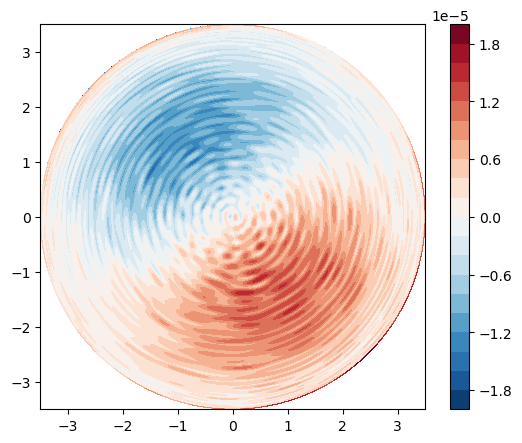

In [16]:
q1t = q1[-1,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

## Plot of steamfunction and potential vorticity in high F

In [19]:
import h5py

with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_51.8_500/snapshots_s4.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_5.18_100/snapshots_s4.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots/snapshots_s4.h5", "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    q1 = f["tasks/q1"][:]
    q2 = f["tasks/q2"][:]
    dset = f['tasks']['q1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)


Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2', 'q1', 'q2']
Task variables: ['constant', 'iteration', 'phi_hash_df042c1481290cb836b7e3520bf4a1e1847fdc1e', 'r_hash_596c2e98b89afac4b9ab58f57307e6fe96acff93', 'sim_time', 'timestep', 'wall_time', 'write_number']
(100, 1024, 256)


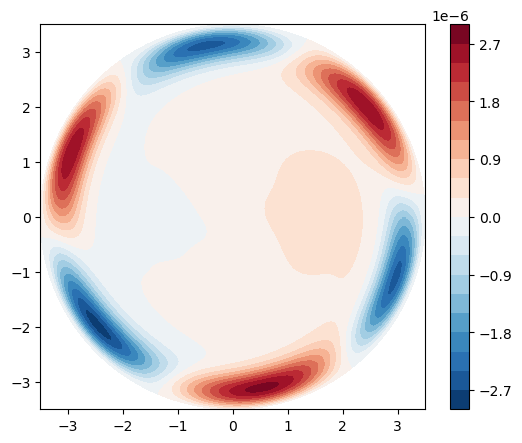

In [22]:
q1t = psi1[6,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

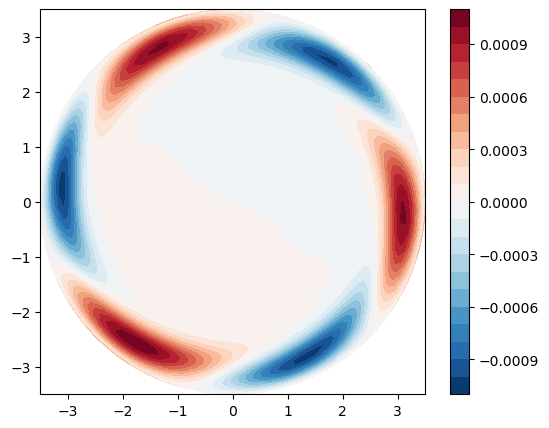

In [23]:
q1t = q1[-1,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

## Growth rate in Low F

In [19]:
import h5py
import glob 
import os 

# h5files 

# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_51.8_500/snapshots_s4.h5", "r") as f:
with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_5.18_100/snapshots_s3.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots/snapshots_s4.h5", "r") as f:
    # psi1_list = []
    # for file in h5_files:
    #     with h5py.File(file, 'r') as f:
    #         psi1_list.append(f['tasks']['psi1'][...])
    # psi1_all = np.concatenate(psi1_list, axis=0)  # stac

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    q1 = f["tasks/q1"][:]
    q2 = f["tasks/q2"][:]
    dset = f['tasks']['q1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))
    # t = f['tasks/iteration'][:]

x = r * np.cos(phi)
y = r * np.sin(phi)


(100, 1024, 256)


In [20]:
t = np.linspace(1e-3,0.1,100)

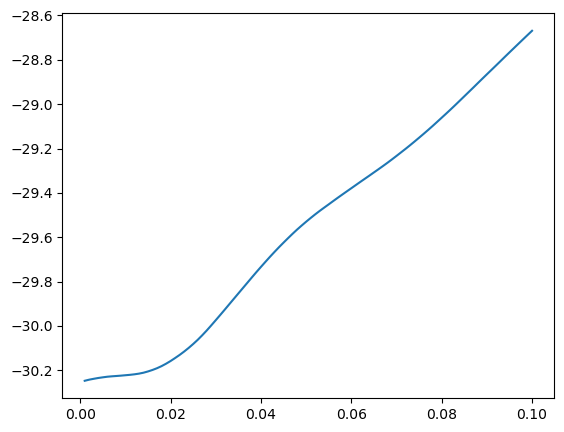

In [21]:
psi1_xy2 = (psi1[:, 256, 128])**2
log_psi1_xy2 = np.log(psi1_xy2)

fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.plot(t, log_psi1_xy2)

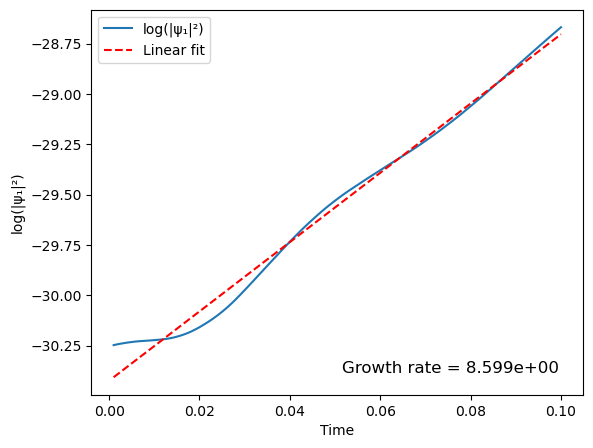

In [22]:
from scipy.stats import linregress

# Linear regression: log_psi1_xy2 = a * t + b
slope, intercept, r_value, p_value, std_err = linregress(t, log_psi1_xy2)

# Growth rate is half of slope
growth_rate = slope / 2

# Plot
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

ax = fig.add_subplot(gs[0, 0])
ax.plot(t, log_psi1_xy2, label='log(|ψ₁|²)')
ax.plot(t, slope * t + intercept, 'r--', label='Linear fit')
ax.set_xlabel('Time')
ax.set_ylabel('log(|ψ₁|²)')
ax.legend()

# Annotate growth rate
ax.text(
    0.95, 0.05,
    fr'Growth rate = {growth_rate:.3e}',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)

plt.show()